### Experimenting with various regression models on the dataset with outliers removed ###

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [97]:
book_movie = pd.read_csv('book_movie_outliers_removed.csv')

In [98]:
book_movie.dtypes

book_title               object
book_rating             float64
book_number_ratings     float64
book_year_published     float64
popularity              float64
release_date             object
movie_runtime           float64
movie_rating            float64
movie_number_ratings    float64
genres                   object
dtype: object

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

cols = ['book_number_ratings' , 'book_number_ratings', 'book_year_published', 'movie_runtime','popularity', 'movie_number_ratings']
X, y = book_movie[cols], book_movie['movie_rating']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [101]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=1) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [102]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.138
Ridge Regression val R^2: 0.138
Degree 2 polynomial regression val R^2: 0.138


In [103]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.165


In [104]:
from sklearn.model_selection import KFold

cols = ['book_rating', 'book_number_ratings' , 'book_year_published', 'popularity', 'movie_runtime', 'movie_number_ratings']
X, y = book_movie[cols], book_movie['movie_rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [105]:
y_pred = lm.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1.9873581448267184


In [117]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.14270813318703623, 0.2828881940446263, 0.10889496618183403, 0.16808271356310867, 0.12379196118532376]
Ridge scores:  [0.1428845154962729, 0.2827151722949335, 0.1089799318502459, 0.16857307994788917, 0.12378779245955707] 

Simple mean cv r^2: 0.165 +- 0.062
Ridge mean cv r^2: 0.165 +- 0.062


In [118]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.180


In [119]:
y_pred = lm.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

0.7323887219685371


In [109]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=10, # number of folds 
                scoring='r2') # scoring metric

array([ 0.08023869,  0.14579895,  0.18275515,  0.17445247,  0.22105298,
        0.1320115 ,  0.32548888,  0.08749013, -0.00928685,  0.22468992])

In [110]:
kf = KFold(n_splits=10, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([ 0.14222629,  0.08562954,  0.34523673,  0.13072167, -0.01495171,
        0.21502902,  0.14539277,  0.22554822,  0.1279044 ,  0.16191338])

In [111]:
kf = KFold(n_splits=10, shuffle=True, random_state = 100000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.15396848681079595
0.15410547830878385


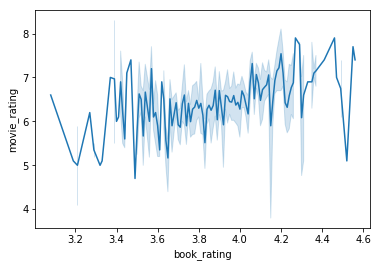

In [112]:
ax = sns.lineplot(x="book_rating", y="movie_rating", data=book_movie)